### Loading the Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# .1. Make ‘PassengerId’ as the index column

In [3]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
df1 = df.set_index("PassengerId")
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# .2. Check the basic details of the dataset

Checking the Shape of Dataset

In [5]:
df1.shape

(891, 11)

In [6]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* This dataset has 11 columns/features.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Note : We see the presence of **Missing/Null** values in the dataset. 

There are 3 columns which have null values in them. They're **:**

`Age`,`Cabin` **&** `Embarked`

In [9]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* The `Youngest` of the Passenger was **4 months** old while the `oldest` was **80 years** old.
* The price of ticket varies in the rage of `0 to 512.32`

In [10]:
df1.duplicated().value_counts()

False    891
dtype: int64

We have **NO** Duplicate Rows

In [11]:
df1["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* Of the 891 passengers **577** were `Males` and **314** were `Females`.


0    549
1    342
Name: Survived, dtype: int64


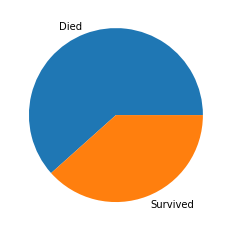

In [12]:
Survival = df1["Survived"].value_counts()
print(f"\n{Survival}")
plt.pie(df1["Survived"].value_counts(),labels=["Died","Survived"]);

* From this we can infer that **:-**
    * **549** passengers `didn't Survive` while,
    * **342** passengers `Survived`.

# .3. Filling all the missing values present in all the columns in the dataset

In [13]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Droping the Cabin Column

In [15]:
#  Droping the Cabin feature as a vast majority of the values are missing and 
# its not logical to assign a mean/median value to all the missing values.

df2 = df1.drop(labels="Cabin", axis=1)
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Next, checking the distribution of Age column.

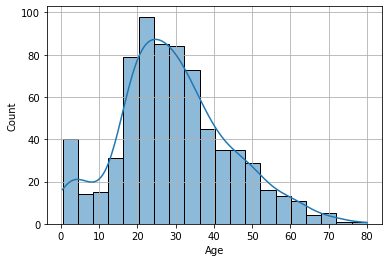

In [16]:
sns.histplot(data = df2, x= "Age",kde=True);
plt.grid()

In [17]:
# Filling the missing Age values with the Median of Age parameter as the the data was slightly right 

df2["Age"] = df2["Age"].fillna(df2["Age"].median())

In [18]:
df2.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

Finally, Checking the frequency of values in Embarked column.

In [19]:
df2["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#  Finding the location of the Null values in the Embarked Feature
# df[df['A'].isnull()].index.tolist()

df2[df2["Embarked"].isnull()].index.tolist()

[62, 830]

In [21]:

df2["Embarked"] = df2["Embarked"].fillna("U")

In [22]:
df2.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


> Now we have completly treated our missing values in the data set

# .4. Checking and handle outliers in at least 3 columns in the dataset

In [24]:
df2.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [25]:
df2.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      4
dtype: int64

In [26]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### .4a.  Checking for Outliers in Age Column.

Text(0.5, 1.0, 'Boxplot of Passenger Age')

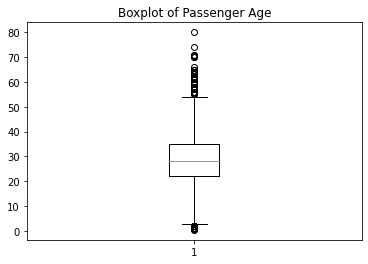

In [27]:
plt.boxplot(df2["Age"])
plt.title("Boxplot of Passenger Age")

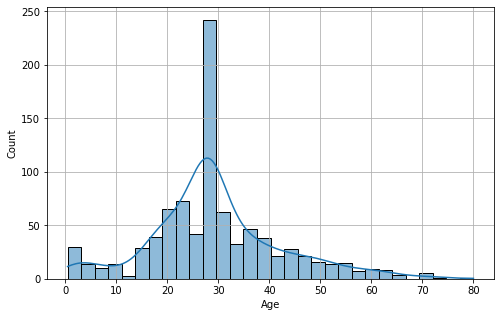

In [28]:
plt.figure(figsize = (8,5))
sns.histplot(data = df2, x= "Age",kde=True);
plt.grid()

In [29]:
df2["Age"].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
74.00      1
0.92       1
70.50      1
12.00      1
Name: Age, Length: 88, dtype: int64

In [30]:
df2["Age"].skew()

0.5102446555756495

In [31]:
Q1 = df2['Age'].quantile(0.25)
Q2 = df2['Age'].quantile(0.5)
Q3 = df2["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df2["Age"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)
        
index = df2[(df2["Age"] > upper_limit)|(df2["Age"] < lower_limit)].index
print(f"\n{index}")
df2.drop(index, inplace=True)
df2.describe()

Q1 = 22.0, 
Q2 = 28.0,
Q3 = 35.0, 
IQR = 13.0, 

Lower limit = 2.5,
Upper limit = 54.5

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')


,Survived,Pclass,Age,SibSp,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.380606,2.341818,28.515152,0.507879,0.357576,31.483615
std,0.485830,0.824096,10.177256,1.090670,0.798599,49.956429
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.416700
75%,1.000000,3.000000,34.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200


We've treated the Age column

### .4b. Handling the outliers in "Fare" feature :

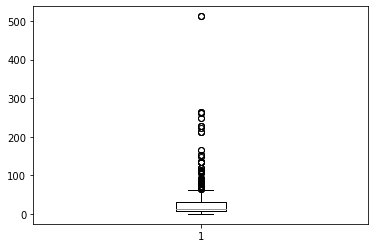

In [32]:
plt.boxplot(df2["Fare"]);

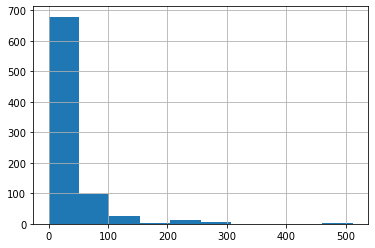

In [33]:
df2["Fare"].hist();

In [34]:
df2["Fare"].skew()

4.939703430470843

Since the Fare column is higly skewed and from the box plot we can say that there are Outliers present in the Data

In [35]:
Q1 = df2['Fare'].quantile(0.25)
Q2 = df2['Fare'].quantile(0.5)
Q3 = df2["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df2["Fare"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)

index = df2[(df2["Fare"] > upper_limit)|(df2["Fare"] < lower_limit)].index
print(index)
df2.drop(index, inplace=True)
df2.describe()

Q1 = 7.8958, 
Q2 = 13.4167,
Q3 = 30.0708, 
IQR = 22.174999999999997, 

Lower limit = -25.366699999999994,
Upper limit = 63.333299999999994
Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.334262,2.512535,28.079387,0.413649,0.317549,17.193204
std,0.472061,0.715818,10.012369,0.855001,0.784792,13.244507
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.889575
50%,0.000000,3.000000,28.000000,0.000000,0.000000,11.750000
75%,1.000000,3.000000,32.875000,1.000000,0.000000,25.928150
max,1.000000,3.000000,54.000000,5.000000,6.000000,61.379200


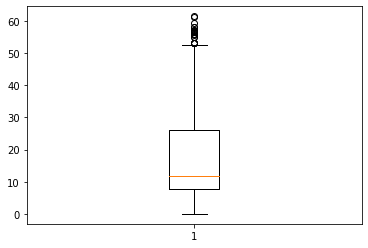

In [36]:
plt.boxplot(df2["Fare"]);

In [37]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


### .4c. Handling the Outliers in SibSp column 

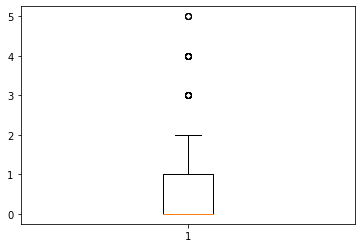

In [38]:
plt.boxplot(data=df2, x = "SibSp");

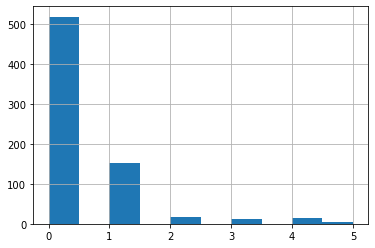

In [39]:
df2["SibSp"].hist();

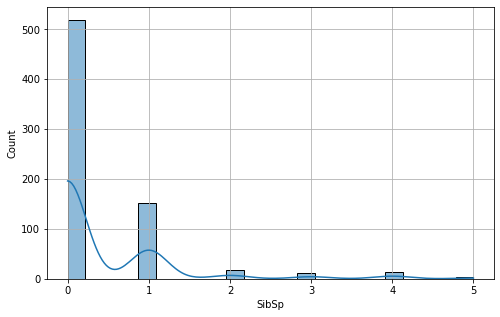

In [40]:
plt.figure(figsize = (8,5))
sns.histplot(data = df2, x= "SibSp",kde=True);
plt.grid()

In [41]:
Q1 = df2['SibSp'].quantile(0.25)
Q2 = df2['SibSp'].quantile(0.5)
Q3 = df2["SibSp"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df2["SibSp"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)
        
index = df2[(df2["SibSp"] > upper_limit)|(df2["SibSp"] < lower_limit)].index
print(f"\n{index}")
df2.drop(index, inplace=True)
df2.describe()

Q1 = 0.0, 
Q2 = 0.0,
Q3 = 1.0, 
IQR = 1.0, 

Lower limit = -1.5,
Upper limit = 2.5

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')


,Survived,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.341074,2.493469,28.711176,0.272859,0.269956,16.631246
std,0.474415,0.723586,9.545220,0.501020,0.754625,13.092563
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.450000
max,1.000000,3.000000,54.000000,2.000000,6.000000,61.379200


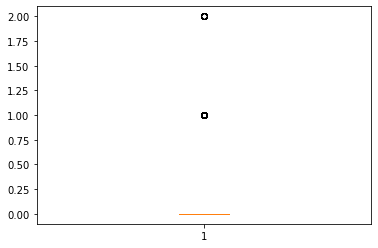

In [42]:
plt.boxplot(data=df2, x = "SibSp");

# .5.Performing the min max scaling on the feature set (Take ‘Survived’ as target)

In [43]:
df2.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S


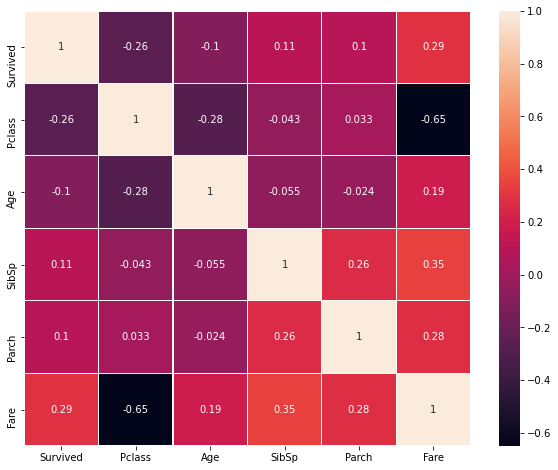

In [44]:
corr = df2.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot=True,linewidths=0.2);

In [45]:
# Dropping all the column containing categorical Data

X = df2.drop(["Survived","Name","Sex","Ticket","Embarked"], axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [46]:
minmax = MinMaxScaler(feature_range = (0,1))
X = minmax.fit_transform(X)
X = pd.DataFrame(X)
X.columns = ["Pclass","Age","SibSp","Parch","Fare"] # Giving the column their respective names
X

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.372549,0.5,0.000000,0.118118
1,1.0,0.450980,0.0,0.000000,0.129115
2,0.0,0.627451,0.5,0.000000,0.865114
3,1.0,0.627451,0.0,0.000000,0.131152
4,1.0,0.490196,0.0,0.000000,0.137804
...,...,...,...,...,...
684,0.5,0.470588,0.0,0.000000,0.211798
685,0.0,0.313725,0.0,0.000000,0.488765
686,1.0,0.490196,0.5,0.333333,0.382051
687,0.0,0.450980,0.0,0.000000,0.488765


In [47]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.00000,689.000000,689.000000
mean,0.746734,0.504141,0.13643,0.044993,0.270959
std,0.361793,0.187161,0.25051,0.125771,0.213306
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962
50%,1.000000,0.490196,0.00000,0.000000,0.171068
75%,1.000000,0.588235,0.00000,0.000000,0.382051
max,1.000000,1.000000,1.00000,1.000000,1.000000


Here, we have scaled all the relavent features including the AGE.